# ALGORITMO GENÉTICO PARA MINIMIZAR A FUNÇÃO ACKLEY

![](ackley.jpg)

Será feita a minimização para a função no espaço bidimensional. O código pode ser expandido para mais dimensões.

Cada cromossomo terá n bits que serão divididos em intervalos iguais para as duas variáveis.

A normalização para o intervalo (-5, 5) será da seguinte forma:

![](norm.jpg)

In [1]:
# Importação das bibliotecas
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

Gera indivíduo

In [2]:
# Criando um indivíduo
def cromossomo(tamanho_crom):
    cromossomo = []
    for i in range(tamanho_crom):
        if random.random() < 0.5:
            cromossomo.append(0)
        else:
            cromossomo.append(1)
        
    return cromossomo

In [3]:
print(cromossomo(16))

[1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1]


Gera população

In [4]:
def gerar_populacao(tamanho_pop, tamanho_crom):
    populacao = []

    for i in range(tamanho_pop):
        crom = cromossomo(tamanho_crom)
        populacao.append(crom)

    return populacao

In [30]:
gerar_populacao(10, 10)

[[0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
 [0, 1, 0, 1, 0, 1, 1, 0, 1, 1],
 [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 1, 0, 0, 1],
 [0, 1, 0, 0, 0, 1, 1, 1, 1, 0],
 [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 1, 0, 1, 1, 0, 1]]

Divide o cromossomo

In [6]:
def variaveis(cromossomo, tam_subgrupo): # Quebra o cromossomo em subgrupos do tamanho de tam_subgrupo
    subgrupos = []
    valor = []
    for i in range(1, len(cromossomo)+1):
        valor.append(cromossomo[i-1]) 
        if i % tam_subgrupo == 0:
            subgrupos.append(valor)
            valor = []

    return subgrupos



In [7]:
variaveis(cromossomo(10), 5)

[[0, 0, 1, 1, 0], [1, 1, 0, 0, 1]]

Convertendo para decimal

In [8]:
def converte_para_decimal(variaveis):
    convertidos = []
    
    for lista_bits in variaveis:
        # Converte a lista de bits em uma string
        bits_string = ''.join(str(bit) for bit in lista_bits)
        # Converte a string binária para decimal
        convertidos.append(int(bits_string, 2))

    return convertidos


Normalização

In [9]:
def normaliza(cromossomo, max_val, min_val, tam_subgrupo):
    subgrupos = variaveis(cromossomo, tam_subgrupo)
    convertidos = converte_para_decimal(subgrupos)
    num_possible_values = 2**tam_subgrupo - 1
    valores_mapeados = []

    # Mapeia o valor decimal para o intervalo [-5, 5]
    for _, valor in enumerate(convertidos):
        valores_mapeados.append(min_val + (valor / num_possible_values) * (max_val - min_val))

    return np.array(valores_mapeados)
    

In [36]:
c = cromossomo(50)
print(c)
normaliza(c, 5, -5, 25)


[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1]


array([-0.58178263, -0.27776317])

In [11]:
c = [0] * 10
print(c)
normaliza(c, 5, -5, 5)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


array([-5., -5.])

Fitness

In [12]:
def fitness(x):
    x = np.array(x)  # Converte x para um array do NumPy
    n = len(x)
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(2 * np.pi * x))

    term1 = -20 * np.exp(-0.2 * np.sqrt(sum1 / n))
    term2 = -np.exp(sum2 / n)
    return term1 + term2 + 20 + np.e

In [13]:
fitness(normaliza(c, 5, -5, 5))

12.642411176571153

Seleciona o melhor indivíduo

In [14]:
def seleciona_melhor(populacao, max_val, min_val, tam_subgrupo):
    melhor_cromosomo = populacao[0]
    menor_valor = fitness(normaliza(melhor_cromosomo, max_val, min_val, tam_subgrupo))
    for i in range(1, len(populacao)):
        valor_atual = fitness(normaliza(populacao[i], max_val, min_val, tam_subgrupo))
        if menor_valor > valor_atual:
            melhor_cromosomo = populacao[i]
            menor_valor = valor_atual

    return menor_valor, melhor_cromosomo

In [40]:
seleciona_melhor(gerar_populacao(10, 10), 5, -5, 5)

(3.3179148541320207, [0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

Seleção dos pais pela roleta viciada

In [16]:
def soma_avaliacoes(populacao, max_val, min_val, tam_subgrupo):
    soma_avalicao = 0
    for individuo in populacao:
        soma_avalicao += (1 / fitness(normaliza(individuo, max_val, min_val, tam_subgrupo))) # Realizando soma inversa para valorizar os menores resultados
    return soma_avalicao


def seleciona_pai(soma_avaliacao, populacao, max_val, min_val, tam_subgrupo):
    pai = -1 # nao selecionou nenhum individuo ainda
    valor_sorteado = random.random() * soma_avaliacao # Simula a roleta sendo girada
    soma = 0
    i = 0
    
    while i < len(populacao) and soma < valor_sorteado:
        soma += (1 / fitness(normaliza(populacao[i], max_val, min_val, tam_subgrupo)))
        pai += 1
        i += 1
    return pai
    

Crossover

In [17]:
def crossover(pai1, pai2):
    ponto_crossover = random.randint(0, len(pai1) - 1)  # Escolhe um ponto de crossover
    filho = pai2[0:ponto_crossover] + pai1[ponto_crossover:]

    return filho


Mutação

In [18]:
def mutacao(cromossomo, taxa_mutacao):
    for i in range(len(cromossomo)):
        if random.random() < taxa_mutacao:
            if cromossomo[i] == 1:
                cromossomo[i] = 0
            else:
                cromossomo[i] = 1

    return cromossomo

Restaurando o tamanho da população

In [19]:
def nova_populacao(populacao, taxa_mutacao, nMelhores, soma_avalicao, tam_subgrupo, max_val, min_val):
    # O elitismo é aplicado para selecionar o melhor indivíduo e gerar n clones dele
    # O crossover é aplicado selecionando indivíduos entre toda a populaçao atual

    #nova_populacao = elitismo(populacao, nMelhores)

    nova_populacao = []

    while len(nova_populacao) < len(populacao):
        pai1 = seleciona_pai(soma_avalicao, populacao, max_val, min_val, tam_subgrupo)
        pai2 = seleciona_pai(soma_avalicao, populacao, max_val, min_val, tam_subgrupo)
        novo_cromo = crossover(populacao[pai1], populacao[pai2])
        nova_populacao.append(mutacao(novo_cromo, taxa_mutacao))

    return nova_populacao

### EXECUÇÃO DO ALGORITMO

In [20]:
def alg_genetico(geracoes, tamanho_pop, tamanho_crom, taxa_mutacao, max_val, min_val, tam_subgrupo):
    melhores = []
    nova_pop = []
    pop = gerar_populacao(tamanho_pop,tamanho_crom) # Criando cromossomos
    melhores.append(seleciona_melhor(pop, max_val, min_val, tam_subgrupo))
    print(f'Melhor da geração 0/{geracoes}: {melhores[0][0]}, {melhores[0][1]}')

    for i in range(geracoes):
        soma_avaliacao = soma_avaliacoes(pop, max_val, min_val, tam_subgrupo)
        nova_pop = nova_populacao(pop, taxa_mutacao, round(tamanho_pop*0.15), soma_avaliacao, tam_subgrupo, max_val, min_val)
        melhor_atual = seleciona_melhor(nova_pop, max_val, min_val, tam_subgrupo)
        print(f'Melhor da geração {i+1}/{geracoes}: {melhor_atual[0]}, {melhor_atual[1]}')
        melhores.append(melhor_atual)
        pop = nova_pop
    
    return melhores

Melhor da geração 0/100: 4.450466401331436, [0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1]
Melhor da geração 1/100: 1.1013498396587633, [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1]
Melhor da geração 2/100: 0.8518048668086249, [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1]
Melhor da geração 3/100: 0.8558116979830115, [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
Melhor da geração 4/100: 0.8474463326040653, [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
Melhor da geração 5/1

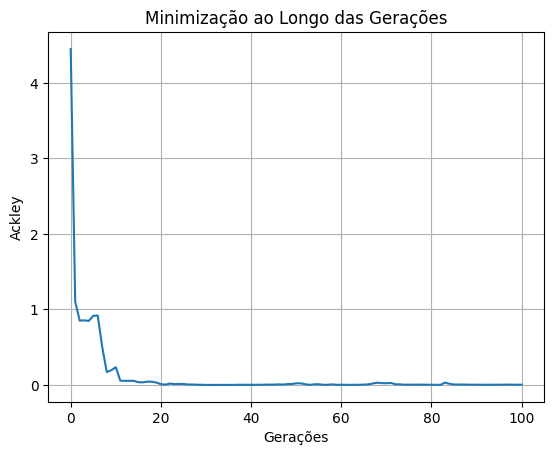

In [41]:
# Execução do algoritmo
melhores = alg_genetico(100, 50, 50, 0.1, 5, -5, 25)

# Extração dos valores de lucro dos melhores cromossomos
funcao = [funcao for funcao, cromossomo in melhores]

# Criação do gráfico de linhas
plt.plot(funcao)
plt.xlabel('Gerações')
plt.ylabel('Ackley')
plt.title('Minimização ao Longo das Gerações')
plt.grid(True)
plt.show()

In [22]:
minimo = min(melhores)
min_funcao = minimo[0]
print(min_funcao)
min_crom = minimo[1]
print(min_crom)
normaliza(min_crom, 5, -5, 25)


5.545537050766214e-05
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]


array([1.86264520e-05, 6.10947627e-06])

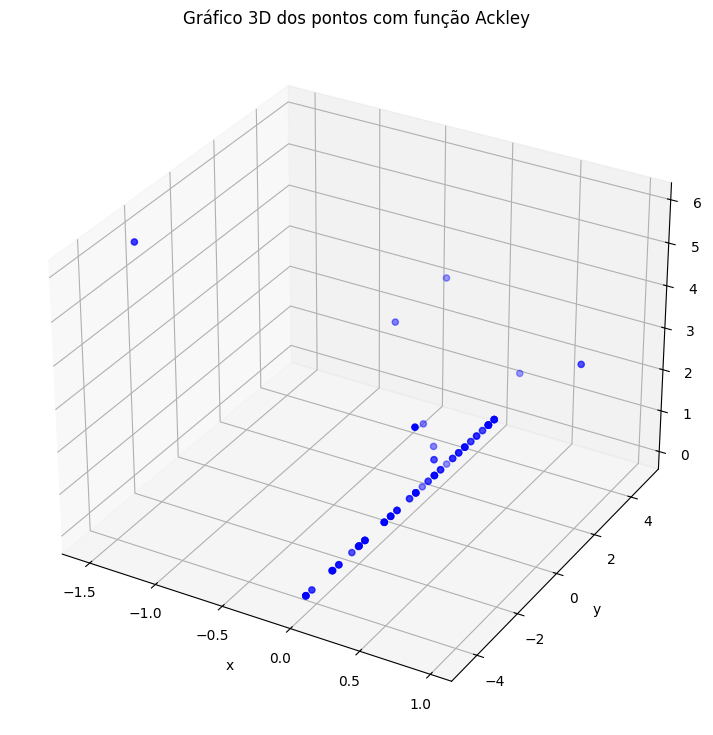

In [23]:
from mpl_toolkits.mplot3d import Axes3D

melhores.sort()
funcao.sort()
valores_x1 = [] 
valores_x2 = [] 
for func, crom in melhores:
    valores = normaliza(crom, 5, -5, 20)
    valores_x1.append(valores[0])
    valores_x2.append(valores[1])

# Converter listas para numpy arrays
valores_x1 = np.array(valores_x1)
valores_x2 = np.array(valores_x2)

# Plot 3D
fig = plt.figure(figsize=(11, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(valores_x1, valores_x2, funcao, c='blue', marker='o')
ax.set_title('Gráfico 3D dos pontos com função Ackley')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

C:\Users\tdw07\AppData\Local\Temp\ipykernel_12164\1628990348.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\tdw07\AppData\Local\Temp\ipykernel_12164\1628990348.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


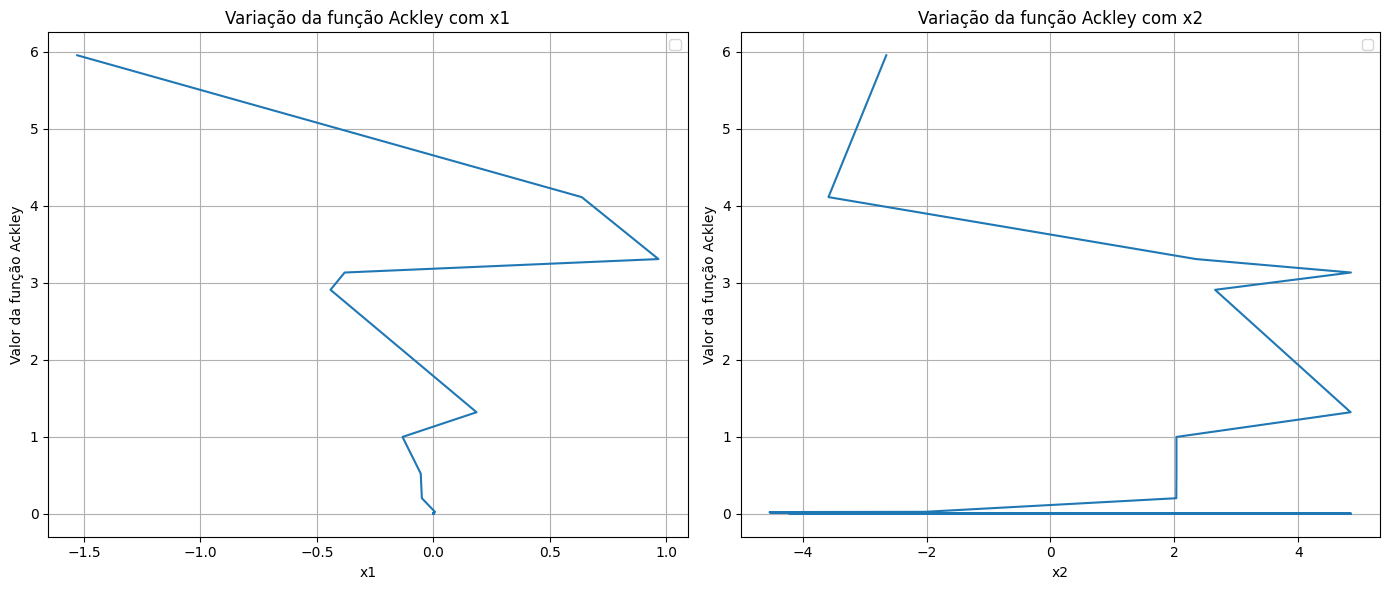

In [24]:
# Plot do gráfico 2D variando x1
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(valores_x1, funcao)
plt.title('Variação da função Ackley com x1')
plt.xlabel('x1')
plt.ylabel('Valor da função Ackley')
plt.legend()
plt.grid(True)

# Plot do gráfico 2D variando x2
plt.subplot(1, 2, 2)
plt.plot(valores_x2, funcao)
plt.title('Variação da função Ackley com x2')
plt.xlabel('x2')
plt.ylabel('Valor da função Ackley')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()